## Part 1. Preprocessing

### 1. Hypothesis

Based on what features what do i think will impact which customers take a loan or not -> come up with hypothesis

In [168]:
import pandas as pd

bank_df_unclean = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
bank_df_unclean = pd.DataFrame(bank_df_unclean)
bank_df_unclean['yes_target'] = bank_df_unclean['y']
bank_df_unclean['yes_target'] = bank_df_unclean['y'].map({'yes': 1, 'no': 0})

#print(bank_df_unclean)
bank_df_unclean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yes_target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### 2. Checking for Nulls

In [169]:
bank_df_unclean = bank_df_unclean.dropna()
print(bank_df_unclean.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
yes_target        0
dtype: int64


### 3. Checking for duplicates

In [170]:

bank_df_unclean = bank_df_unclean.drop_duplicates()
print(bank_df_unclean.duplicated().sum())


0


### 4. Outliers and Statistics

In [171]:
bank_df_clean = bank_df_unclean
bank_stats = bank_df_clean.describe()
print(bank_stats)

               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000      

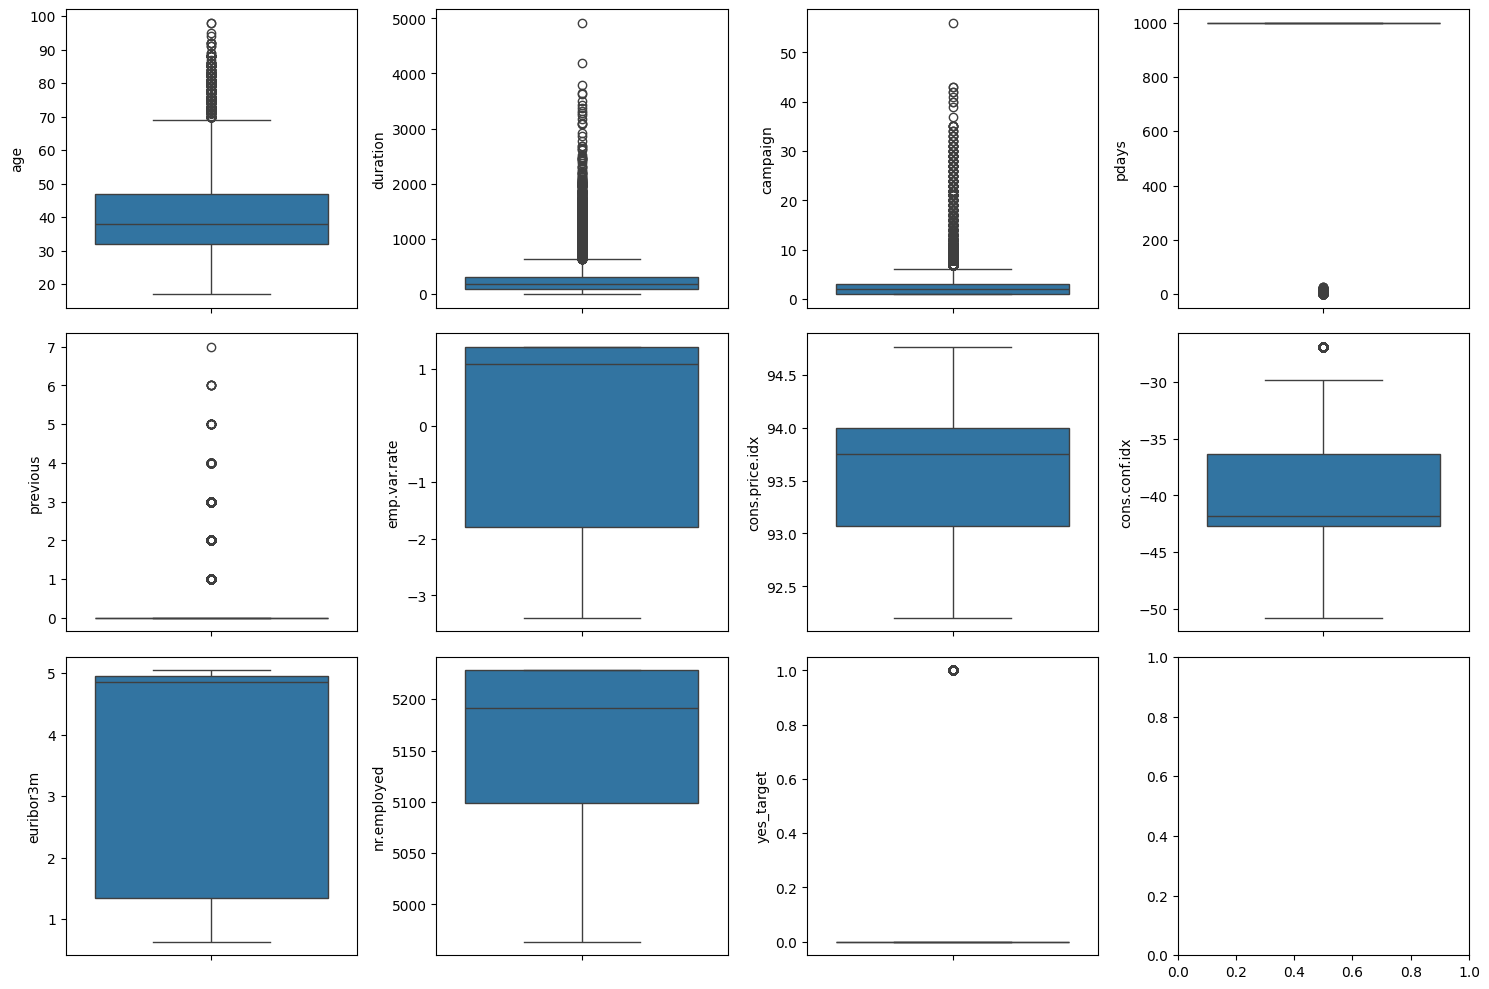

In [172]:
import seaborn as sns 
import matplotlib.pyplot as plt 


fig, axis = plt.subplots(3, 4, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = bank_df_clean, y = "age")
sns.boxplot(ax = axis[0, 1], data = bank_df_clean, y = "duration")
sns.boxplot(ax = axis[0, 2], data = bank_df_clean, y = "campaign")
sns.boxplot(ax = axis[0, 3], data = bank_df_clean, y = "pdays")
sns.boxplot(ax = axis[1, 0], data = bank_df_clean, y = "previous")
sns.boxplot(ax = axis[1, 1], data = bank_df_clean, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 2], data = bank_df_clean, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 3], data = bank_df_clean, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 0], data = bank_df_clean, y = "euribor3m")
sns.boxplot(ax = axis[2, 1], data = bank_df_clean, y = "nr.employed")
sns.boxplot(ax = axis[2, 2], data = bank_df_clean, y = "yes_target")


plt.tight_layout()

plt.show()

### Find Best Features

!!!!!!!!!!!!do heatmap and kbest to find the best features

CATEGORIES: job, marital, education, default, housing, loan, contact, month, days_of_the_week, poutcome, target
FEATURES: age, campaingn, duration, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

### 5. ONE HOT ENCODING

In [190]:

from sklearn.preprocessing import OneHotEncoder

#Convert all categorical values to 1 0 
encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse_output=True)


categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
bank_df_categories_data = bank_df_clean[categorical_variables]

encoded_data = encoder.fit_transform(bank_df_categories_data)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_variables))

#encode_df = encoded_df.reset_index(drop=True, inplace=True)
#bank_df_clean = pd.concat([bank_df_clean.drop(columns=categorical_variables), encoded_df], axis=1)
print(encoded_df)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0             0.0              0.0               0.0            1.0   
1             0.0              0.0               0.0            0.0   
2             0.0              0.0               0.0            0.0   
3             1.0              0.0               0.0            0.0   
4             0.0              0.0               0.0            0.0   
...           ...              ...               ...            ...   
41171         0.0              0.0               0.0            0.0   
41172         0.0              1.0               0.0            0.0   
41173         0.0              0.0               0.0            0.0   
41174         0.0              0.0               0.0            0.0   
41175         0.0              0.0               0.0            0.0   

       job_management  job_retired  job_self-employed  job_services  \
0                 0.0          0.0                0.0           0.0   
1    

## 6. Determine Best Features to Use <br>
Based on Heat Map Correlation Matrix

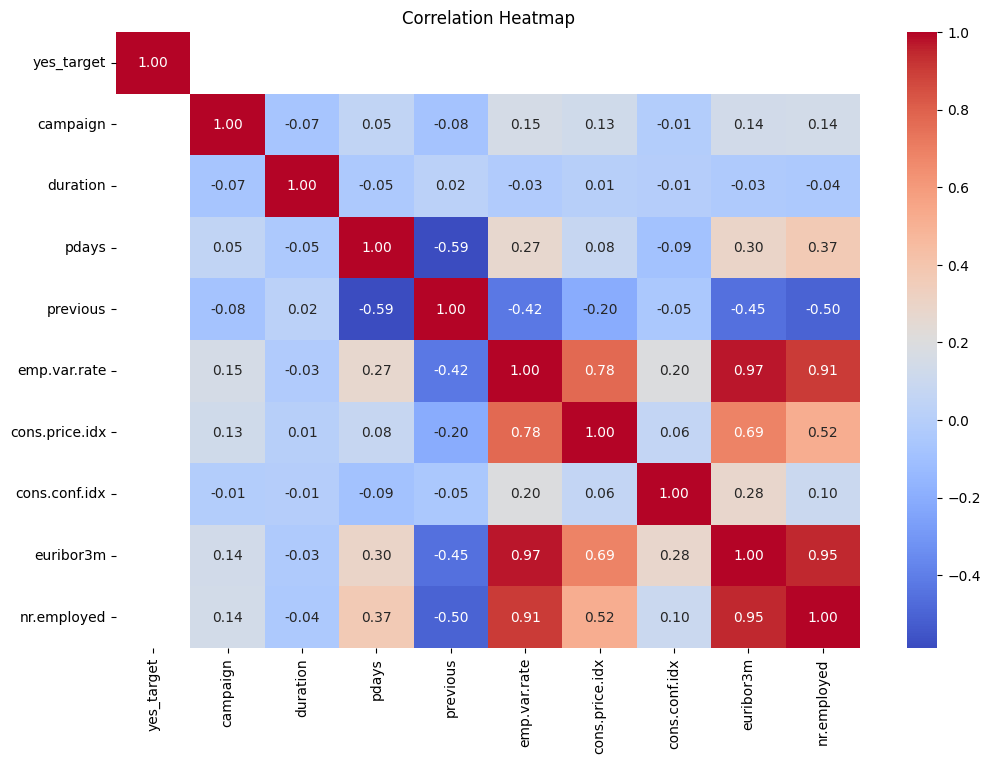

In [174]:
#create df of features only 
feature_variables = ['campaign', 'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
features_data = bank_df_clean[feature_variables]

numerical_data_w_target = bank_df_clean['yes_target']
bank_df_features_w_target = pd.concat([numerical_data_w_target, features_data])

corr_matrix = bank_df_features_w_target.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()




emp.var.rate, euribor3m, nr.employed, cons.price.idx are the most correlated <br>
These are 3 economic indicators 

## 7. Feature Scaling

In [175]:

feature_variables = [ 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
features_df = bank_df_clean[feature_variables]


#### Use standard scaling techniques

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_numerical_data = scaler.fit_transform(features_df)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=feature_variables)

#drop nulls
scaled_numerical_df = scaled_numerical_df.dropna()
print(scaled_numerical_df)



       emp.var.rate  cons.price.idx  euribor3m  nr.employed
0          0.648101        0.722628   0.712463     0.331695
1          0.648101        0.722628   0.712463     0.331695
2          0.648101        0.722628   0.712463     0.331695
3          0.648101        0.722628   0.712463     0.331695
4          0.648101        0.722628   0.712463     0.331695
...             ...             ...        ...          ...
41171     -0.752402        2.058076  -1.495197    -2.815689
41172     -0.752402        2.058076  -1.495197    -2.815689
41173     -0.752402        2.058076  -1.495197    -2.815689
41174     -0.752402        2.058076  -1.495197    -2.815689
41175     -0.752402        2.058076  -1.495197    -2.815689

[41176 rows x 4 columns]


#### Combine with One Hot Encoded DF

In [191]:

# Reset indices to avoid null values during concatenation
scaled_numerical_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)


#bank_df_clean = bank_df_clean.drop(columns=feature_variables)
bank_df_clean_scaled = pd.concat([scaled_numerical_df, encoded_df], axis = 1)

print(bank_df_clean_scaled.head())

   emp.var.rate  cons.price.idx  euribor3m  nr.employed  job_admin.  \
0      0.648101        0.722628   0.712463     0.331695         0.0   
1      0.648101        0.722628   0.712463     0.331695         0.0   
2      0.648101        0.722628   0.712463     0.331695         0.0   
3      0.648101        0.722628   0.712463     0.331695         1.0   
4      0.648101        0.722628   0.712463     0.331695         0.0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              0.0               0.0            1.0             0.0   
1              0.0               0.0            0.0             0.0   
2              0.0               0.0            0.0             0.0   
3              0.0               0.0            0.0             0.0   
4              0.0               0.0            0.0             0.0   

   job_retired  ...  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0.0  ...              0.0              1.0              0.0  

## 8. Train and Test

In [196]:

import seaborn as sns
from sklearn.model_selection import train_test_split

x = bank_df_clean_scaled
y = bank_df_clean['yes_target']

# We divide the sample into train and test at 80%
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

#create csv
X_train, y_train = 


print(X_train.head())

       emp.var.rate  cons.price.idx  euribor3m  nr.employed  job_admin.  \
12346      0.839079        0.591329   0.771272     0.845186         0.0   
8564       0.839079        1.536336   0.716499     0.845186         1.0   
21417      0.839079       -0.227562   0.773578     0.845186         1.0   
3315       0.648101        0.722628   0.714192     0.331695         1.0   
33236     -1.198017       -1.179479  -1.343561    -0.940269         0.0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
12346              0.0               1.0            0.0             0.0   
8564               0.0               0.0            0.0             0.0   
21417              0.0               0.0            0.0             0.0   
3315               0.0               0.0            0.0             0.0   
33236              1.0               0.0            0.0             0.0   

       job_retired  ...  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
12346          0.0  

### 9. Convert to CSV File

In [202]:

train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)


train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

#print(train_df)

## Part 2: Hyperparameter Optimization

### 1. train base model

In [211]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



test_data = pd.read_csv("/workspaces/logistic-regression-project-tutorial/test_data.csv")
train_data = pd.read_csv("/workspaces/logistic-regression-project-tutorial/train_data.csv")

X_train = train_data.drop(["yes_target"], axis = 1)
y_train = train_data["yes_target"]
X_test = test_data.drop(["yes_target"], axis = 1)
y_test = test_data["yes_target"]

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

1.0